# Exploratory Data Analysis on Global Tourism Economy Dataset

## 1) Introduction

This project analyses the global tourism economy using a dataset that contains tourism indicators and macro-economic variables for multiple countries from 1999 to 2023.  
The goal of this EDA is to understand global tourism trends, compare countries, measure the economic impact of tourism, and identify patterns related to tourist spending and economic growth.


## 2) About the Dataset

This dataset contains global tourism and economic indicators for multiple countries from 1999 to 2023.

### Column Descriptions

| Column | Description |
|--------|-------------|
| country | Name of the country |
| country_code | ISO 3-letter country code (e.g., USA) |
| year | Year of observation |
| tourism_receipts | Income earned from international tourism (in USD) |
| tourism_arrivals | Number of international tourists arriving |
| tourism_exports | Share of exports coming from tourism (%) |
| tourism_departures | Number of residents travelling abroad for tourism |
| tourism_expenditures | Spending by international tourists (in USD) |
| gdp | Gross Domestic Product (in USD) |
| inflation | Annual inflation rate (%) |
| unemployment | Percentage of the labour force unemployed |



## 3) Import Libraries & Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("world_tourism_.csv")
df

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,7.903
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,3.521418e+09,12.686269,7.935
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,2.813572e+09,12.686269,7.953
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,3.825701e+09,12.686269,7.930
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,4.520947e+09,12.686269,7.880
...,...,...,...,...,...,...,...,...,...,...,...
4245,Zimbabwe,ZWE,2019,285000000.0,2294000.0,5.411115,3275000.0,4.760583,2.571741e+10,255.304991,7.373
4246,Zimbabwe,ZWE,2020,66000000.0,639000.0,1.253967,NaN,2.860109,2.686794e+10,557.201817,8.621
4247,Zimbabwe,ZWE,2021,NaN,NaN,NaN,NaN,NaN,2.724052e+10,98.546105,9.540
4248,Zimbabwe,ZWE,2022,NaN,NaN,NaN,NaN,NaN,3.278975e+10,104.705171,10.087


# 5) Understand the Structure

In [3]:
df.shape

(4250, 11)

In [4]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_departures',
       'tourism_expenditures', 'gdp', 'inflation', 'unemployment'],
      dtype='object')

In [5]:
df.dtypes

country                  object
country_code             object
year                      int64
tourism_receipts        float64
tourism_arrivals        float64
tourism_exports         float64
tourism_departures      float64
tourism_expenditures    float64
gdp                     float64
inflation               float64
unemployment            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               4250 non-null   object 
 1   country_code          4250 non-null   object 
 2   year                  4250 non-null   int64  
 3   tourism_receipts      2948 non-null   float64
 4   tourism_arrivals      3235 non-null   float64
 5   tourism_exports       2785 non-null   float64
 6   tourism_departures    1767 non-null   float64
 7   tourism_expenditures  2831 non-null   float64
 8   gdp                   4223 non-null   float64
 9   inflation             4250 non-null   float64
 10  unemployment          4250 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 365.4+ KB


In [7]:
df.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,4250.000000,2.948000e+03,3.235000e+03,2785.000000,1.767000e+03,2831.000000,4.223000e+03,4250.000000,4250.000000
mean,2011.000000,4.236790e+09,8.402858e+06,15.447031,9.702541e+06,6.652344,2.664776e+11,6.651127,7.964635
std,7.211951,8.860348e+09,2.253721e+07,17.149974,2.028947e+07,4.429657,9.645621e+11,18.391176,6.183894
min,1999.000000,5.000000e+05,1.100000e+03,0.014340,2.000000e+03,0.157818,2.254000e+00,-16.859691,0.039000
25%,2005.000000,1.700000e+08,3.590000e+05,4.104015,6.190000e+05,3.681113,5.068340e+09,1.672905,3.714000
50%,2011.000000,8.485000e+08,1.402000e+06,8.645967,2.281000e+06,5.607922,2.162995e+10,3.590435,6.051000
75%,2017.000000,4.116000e+09,5.493000e+06,19.587659,7.946500e+06,8.294249,1.322776e+11,7.003607,10.586250
max,2023.000000,7.251800e+10,2.178770e+08,101.966999,1.546320e+08,28.192276,1.788178e+13,557.201817,37.320000


In [8]:
df['country'].nunique()

170

## 4) Data Quality Check

In this step, we examine the quality of the dataset before doing any analysis.

We will check:

- Missing values in each column
- Duplicate rows


**Purpose:**  
to make sure the dataset is clean, consistent and ready for analysis.  
If we find issues here, we will fix them in the next step (data cleaning).


In [9]:
df.duplicated().value_counts()

False    4250
Name: count, dtype: int64

In [10]:
df.isna().sum()

country                    0
country_code               0
year                       0
tourism_receipts        1302
tourism_arrivals        1015
tourism_exports         1465
tourism_departures      2483
tourism_expenditures    1419
gdp                       27
inflation                  0
unemployment               0
dtype: int64

In [11]:
df.isna().sum().sort_values(ascending=False)


tourism_departures      2483
tourism_exports         1465
tourism_expenditures    1419
tourism_receipts        1302
tourism_arrivals        1015
gdp                       27
country                    0
year                       0
country_code               0
inflation                  0
unemployment               0
dtype: int64

In [12]:
missing = df.isna().sum().to_frame('missing_count')
missing['missing_percentage'] = (missing['missing_count'] / len(df) * 100).round(2)
missing


,missing_count,missing_percentage
country,0,0.00
country_code,0,0.00
year,0,0.00
tourism_receipts,1302,30.64
tourism_arrivals,1015,23.88
tourism_exports,1465,34.47
tourism_departures,2483,58.42
tourism_expenditures,1419,33.39
gdp,27,0.64
inflation,0,0.00


In [13]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_departures',
       'tourism_expenditures', 'gdp', 'inflation', 'unemployment'],
      dtype='object')

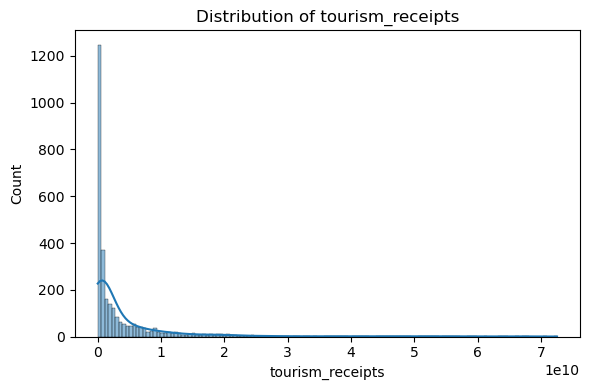

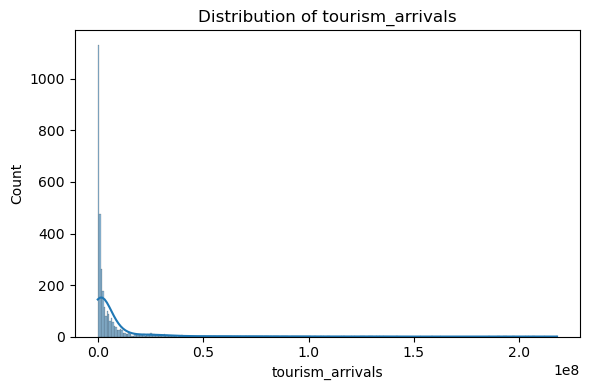

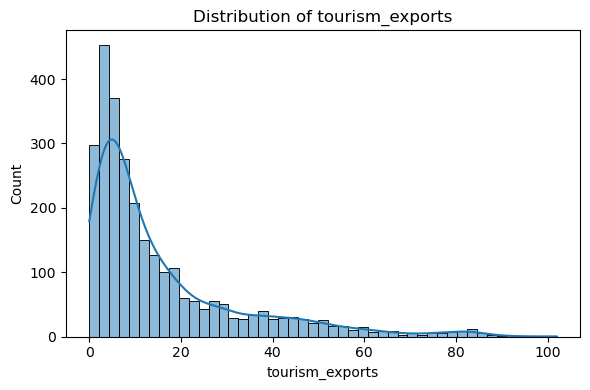

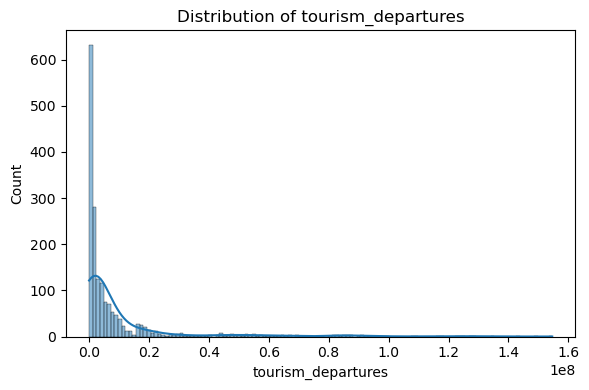

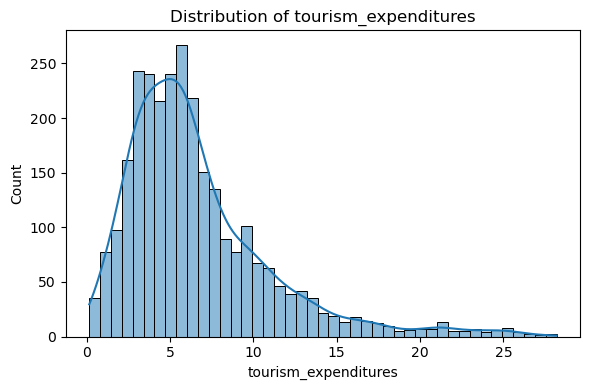

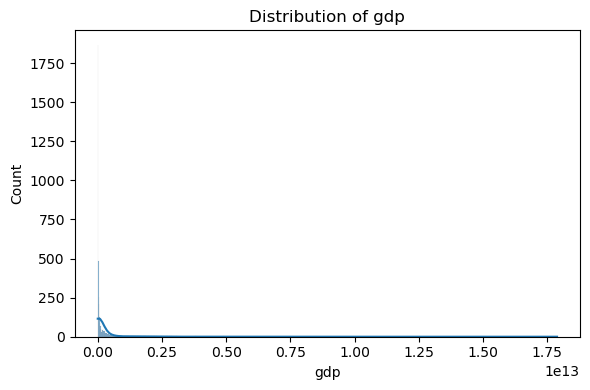

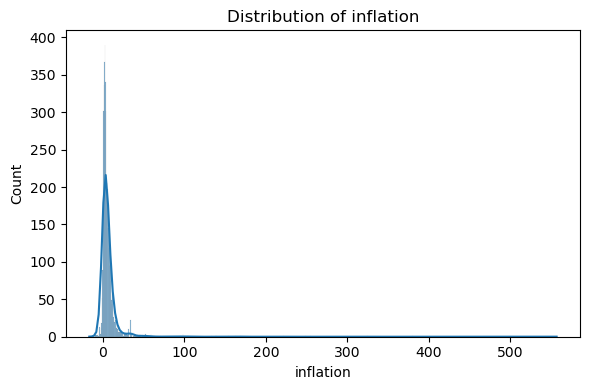

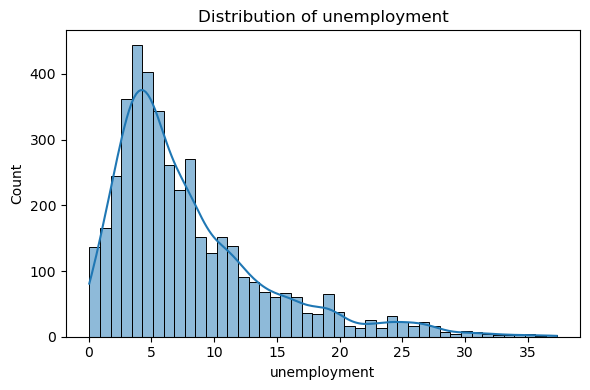

In [14]:
numeric_cols = ['tourism_receipts','tourism_arrivals','tourism_exports','tourism_departures',
                'tourism_expenditures','gdp','inflation','unemployment']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## 5) Data Cleaning

In this step, we clean the dataset to make it ready for analysis.

From the missing value analysis, we observed that some columns have medium to high missing percentages.  
The column `tourism_departures` contains more than 60% missing values, so this variable is not reliable for analysis.  
Therefore, this column will be removed from the dataset.

For the remaining columns, we will fill missing values using simple statistical imputation:

- **Numeric columns** → filled using the **median** of each column  
  (median is more robust than mean when data is skewed)
- **Categorical columns** → filled using the **mode** (most frequent value)

This ensures that the dataset becomes complete (no NaN values) before we proceed to plotting distributions and performing further EDA.


In [15]:
df = df.drop(columns=['tourism_departures'])


In [16]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [17]:
df.isna().sum()

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64

### 

In [18]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [19]:
top10 = (
    df.groupby('country')['tourism_receipts']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,tourism_receipts
0,France,5.034662e+10
1,Germany,3.809172e+10
2,Thailand,2.471310e+10
3,Australia,2.440914e+10
4,Italy,2.292448e+10
5,Japan,1.611966e+10
6,Switzerland,1.394166e+10
7,Malaysia,1.351534e+10
8,Greece,1.307330e+10
9,Mexico,1.279626e+10


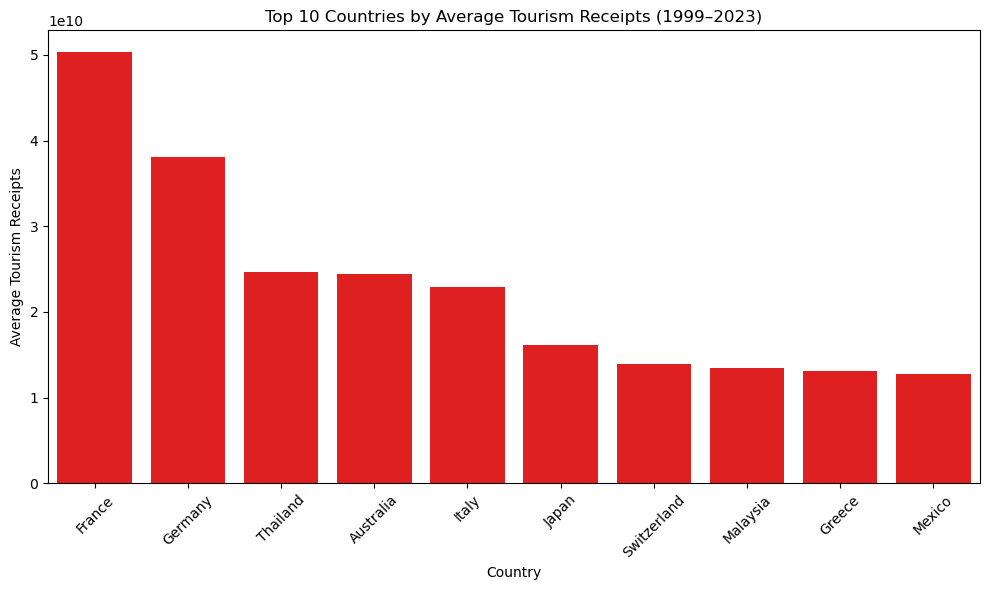

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='tourism_receipts',color='red')

plt.xlabel("Country")
plt.ylabel("Average Tourism Receipts")
plt.title("Top 10 Countries by Average Tourism Receipts (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [22]:
top10 = (
    df.groupby('country')['tourism_arrivals']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,tourism_arrivals
0,France,1.326409e+08
1,China,1.048498e+08
2,Spain,8.347132e+07
3,Mexico,7.990232e+07
4,Italy,6.294126e+07
5,Poland,5.856712e+07
6,Croatia,4.170688e+07
7,Hungary,3.628928e+07
8,Canada,2.817172e+07
9,United Kingdom,2.741464e+07


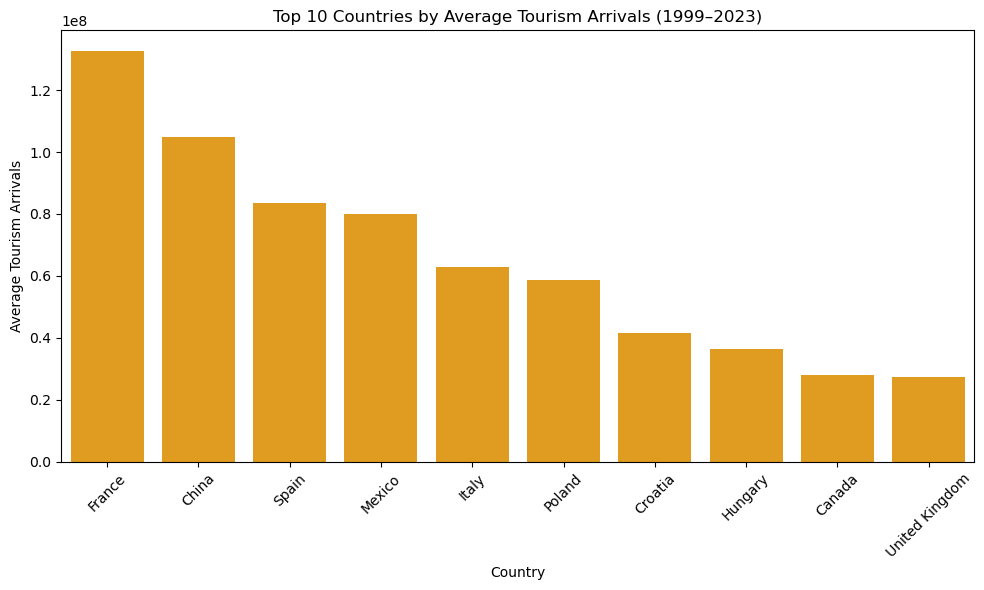

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='tourism_arrivals',color='orange')

plt.xlabel("Country")
plt.ylabel("Average Tourism Arrivals")
plt.title("Top 10 Countries by Average Tourism Arrivals (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [25]:
top10 = (
    df.groupby('country')['tourism_exports']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,tourism_exports
0,Vanuatu,59.933006
1,Albania,50.022542
2,Cabo Verde,49.176125
3,Palau,47.454252
4,Sao Tome and Principe,45.205412
5,Samoa,44.755865
6,Grenada,41.447426
7,Barbados,39.092842
8,Maldives,38.482948
9,Fiji,38.215257


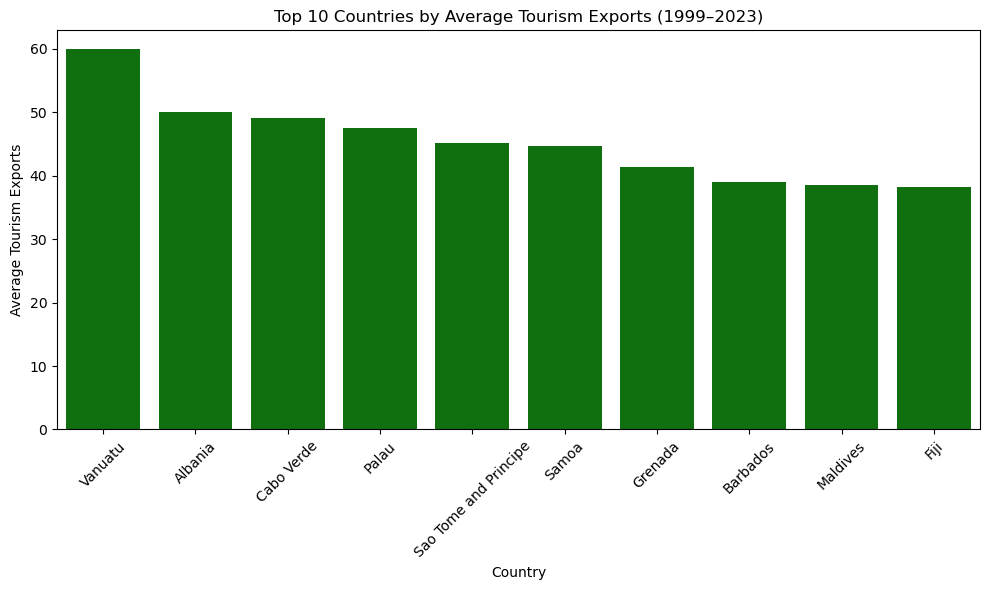

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='tourism_exports',color='green')

plt.xlabel("Country")
plt.ylabel("Average Tourism Exports")
plt.title("Top 10 Countries by Average Tourism Exports (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [28]:
top10 = (
    df.groupby('country')['tourism_expenditures']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,tourism_expenditures
0,Albania,20.718692
1,Kuwait,20.523662
2,Tuvalu,15.639477
3,Lebanon,14.219454
4,Armenia,12.579938
5,Lesotho,12.235177
6,Argentina,11.664004
7,Marshall Islands,11.218354
8,Qatar,11.109749
9,Cabo Verde,10.962221


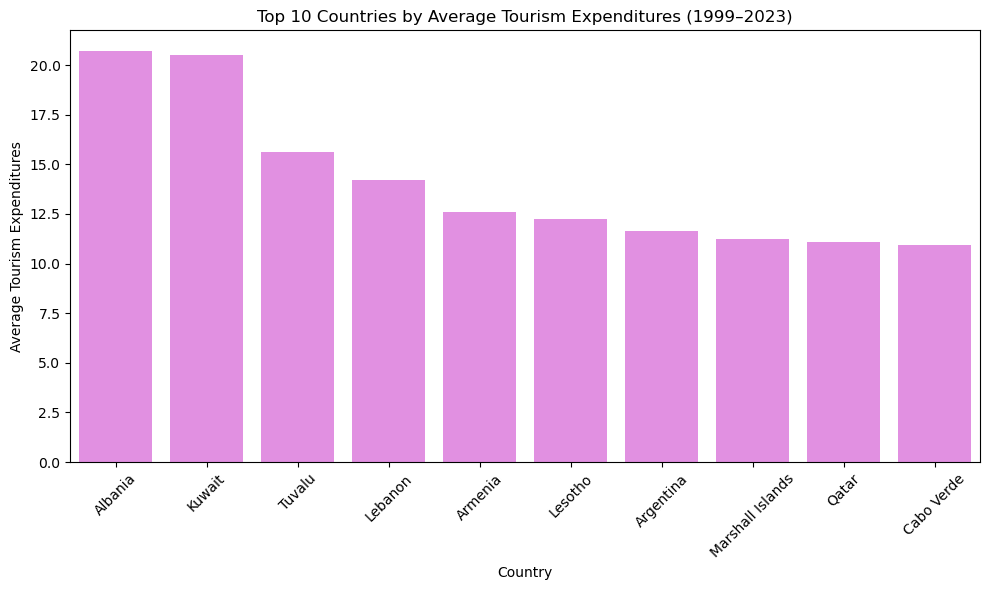

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='tourism_expenditures',color='violet')

plt.xlabel("Country")
plt.ylabel("Average Tourism Expenditures")
plt.title("Top 10 Countries by Average Tourism Expenditures (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [31]:
top10 = (
    df.groupby('country')['gdp']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,gdp
0,China,8.007896e+12
1,Japan,4.937879e+12
2,Germany,3.389005e+12
3,United Kingdom,2.600404e+12
4,France,2.431754e+12
5,Italy,1.924660e+12
6,India,1.733452e+12
7,Brazil,1.570188e+12
8,Canada,1.471807e+12
9,Spain,1.239427e+12


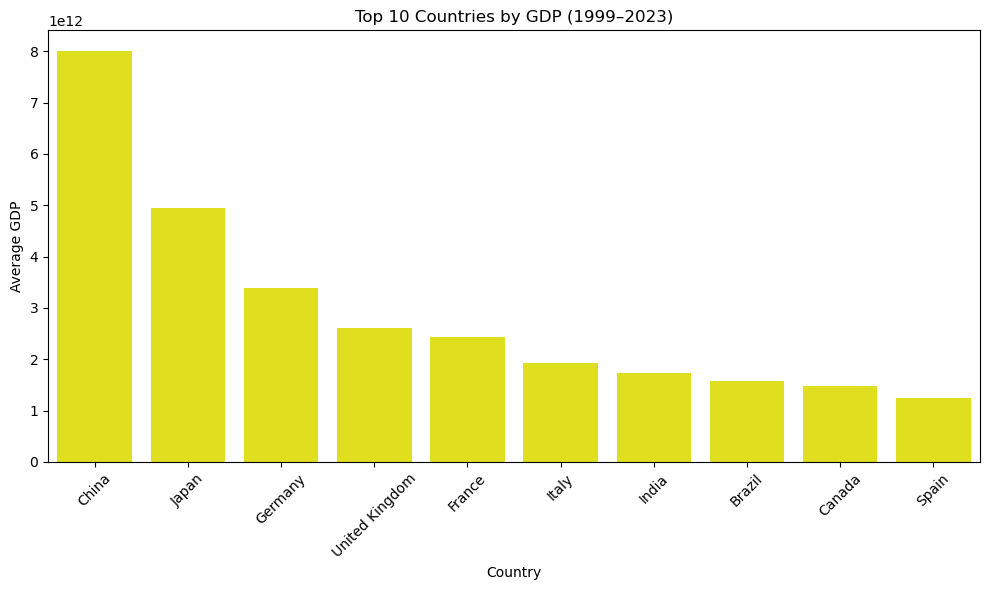

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='gdp',color='yellow')

plt.xlabel("Country")
plt.ylabel("Average GDP")
plt.title("Top 10 Countries by GDP (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [34]:
top10 = (
    df.groupby('country')['inflation']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,inflation
0,Angola,51.802081
1,Sudan,49.677437
2,Zimbabwe,46.916084
3,Argentina,41.417478
4,South Sudan,39.099256
5,Belarus,35.989276
6,Lebanon,27.055877
7,Suriname,26.464618
8,Guinea,18.381089
9,Ghana,17.053627


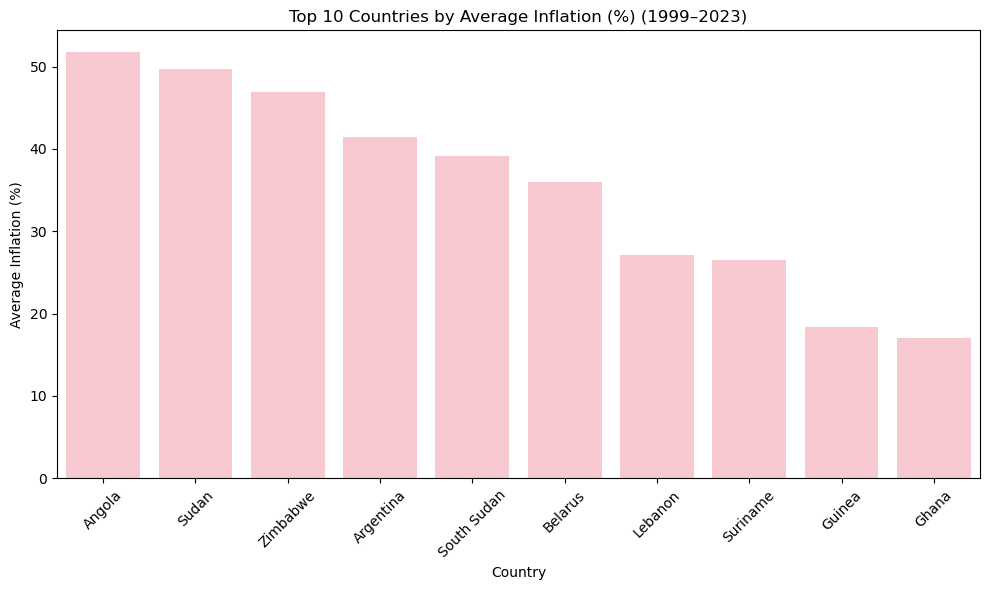

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='inflation', color='pink')

plt.xlabel("Country")
plt.ylabel("Average Inflation (%)")  
plt.title("Top 10 Countries by Average Inflation (%) (1999–2023)")  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [37]:
top10 = (
    df.groupby('country')['unemployment']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top10

,country,unemployment
0,North Macedonia,28.05252
1,Eswatini,27.16772
2,Djibouti,26.43200
3,South Africa,26.41948
4,Bosnia and Herzegovina,23.52492
5,Montenegro,21.45812
6,Grenada,21.01796
7,Namibia,20.86228
8,Botswana,19.44024
9,Gabon,19.22936


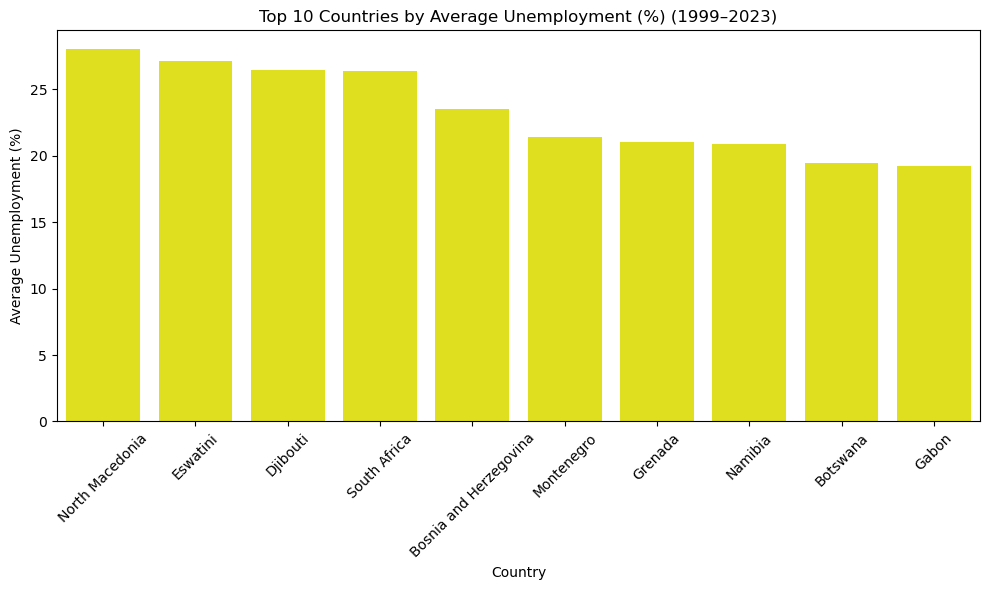

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='country', y='unemployment', color='yellow')

plt.xlabel("Country")
plt.ylabel("Average Unemployment (%)")     
plt.title("Top 10 Countries by Average Unemployment (%) (1999–2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

UNIVARIATE ANALYSIS – TOURISM_RECEIPTS


count    4.250000e+03
mean     3.198778e+09
std      7.542535e+09
min      5.000000e+05
25%      3.872500e+08
50%      8.485000e+08
75%      2.037250e+09
max      7.251800e+10
Name: tourism_receipts, dtype: float64

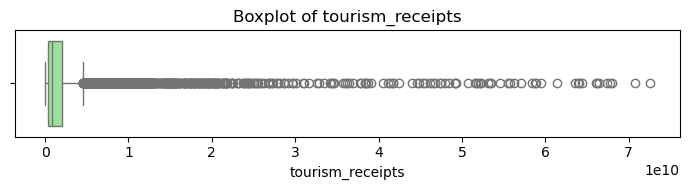

UNIVARIATE ANALYSIS – TOURISM_ARRIVALS


count    4.250000e+03
mean     6.730889e+06
std      1.988729e+07
min      1.100000e+03
25%      6.000000e+05
50%      1.402000e+06
75%      3.519000e+06
max      2.178770e+08
Name: tourism_arrivals, dtype: float64

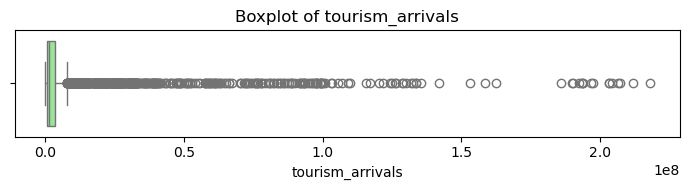

UNIVARIATE ANALYSIS – TOURISM_EXPORTS


count    4250.000000
mean       13.102665
std        14.253522
min         0.014340
25%         6.063498
50%         8.645967
75%        12.652906
max       101.966999
Name: tourism_exports, dtype: float64

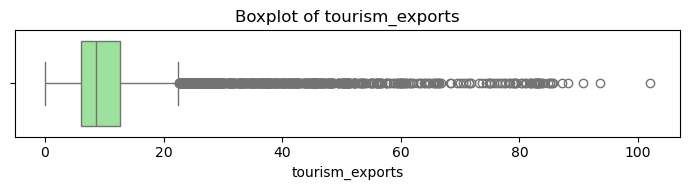

UNIVARIATE ANALYSIS – TOURISM_EXPENDITURES


count    4250.000000
mean        6.303630
std         3.648505
min         0.157818
25%         4.697380
50%         5.607922
75%         6.557018
max        28.192276
Name: tourism_expenditures, dtype: float64

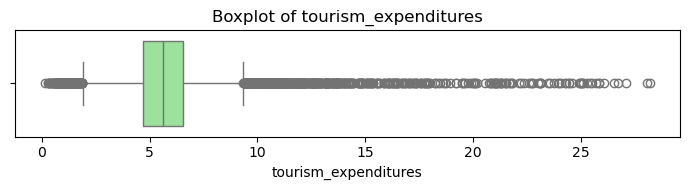

UNIVARIATE ANALYSIS – GDP


count    4.250000e+03
mean     2.649221e+11
std      9.616894e+11
min      2.254000e+00
25%      5.125583e+09
50%      2.162995e+10
75%      1.309367e+11
max      1.788178e+13
Name: gdp, dtype: float64

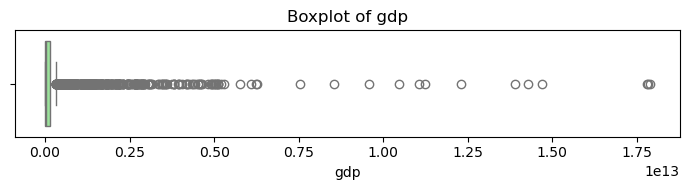

UNIVARIATE ANALYSIS – INFLATION


count    4250.000000
mean        6.651127
std        18.391176
min       -16.859691
25%         1.672905
50%         3.590435
75%         7.003607
max       557.201817
Name: inflation, dtype: float64

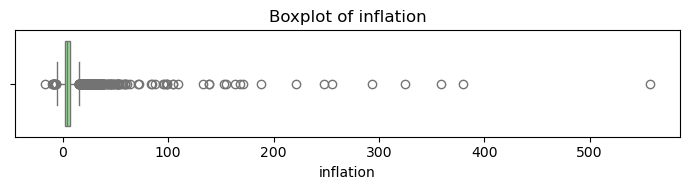

UNIVARIATE ANALYSIS – UNEMPLOYMENT


count    4250.000000
mean        7.964635
std         6.183894
min         0.039000
25%         3.714000
50%         6.051000
75%        10.586250
max        37.320000
Name: unemployment, dtype: float64

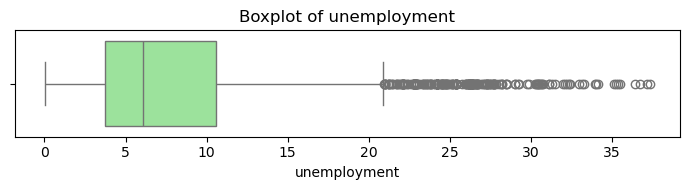

In [39]:
numeric_cols = [
    'tourism_receipts',
    'tourism_arrivals',
    'tourism_exports',
    'tourism_expenditures',
    'gdp',
    'inflation',
    'unemployment'
]

for col in numeric_cols:
    print("====================================")
    print(f"UNIVARIATE ANALYSIS – {col.upper()}")
    print("====================================")
    
    # summary
    display(df[col].describe())
    
    
    
    # boxplot
    plt.figure(figsize=(7,2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [40]:
def outlier_detection(df, columns):
    outliers = {}
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outlier = df[(df[column] < lower) | (df[column] > upper)][column]

        print(f'\nColumn: {column}')
        print(f'Lower Limit: {lower:.2f}')
        print(f'Upper Limit: {upper:.2f}')
        print(f'Outlier Count: {len(outlier)}')
        print(f'Outlier Percentage: {len(outlier) / len(df) * 100:.2f}%')
        print(f'Outlier Values: {list(outlier[:10])} ...')

        outliers[column] = outlier

    return outliers

In [41]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [42]:
outlier_detection(df,['gdp'])




Column: gdp
Lower Limit: -183591116991.36
Upper Limit: 319653417133.73
Outlier Count: 629
Outlier Percentage: 14.80%
Outlier Values: [361558037110.419, 332976484577.619, 423627422092.49, 530158122010.442, 545982375701.128, 552025140252.246, 526319673731.638, 594749285413.212, 557532320662.955, 643628393281.364] ...


{'gdp': 159     3.615580e+11
 160     3.329765e+11
 161     4.236274e+11
 162     5.301581e+11
 163     5.459824e+11
             ...     
 4120    2.851407e+12
 4121    2.696778e+12
 4122    3.143323e+12
 4123    3.114042e+12
 4124    3.380855e+12
 Name: gdp, Length: 629, dtype: float64}

In [43]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [44]:
outlier_detection(df,['tourism_receipts'])


Column: tourism_receipts
Lower Limit: -2087750000.00
Upper Limit: 4512250000.00
Outlier Count: 699
Outlier Percentage: 16.45%
Outlier Values: [5030000000.0, 5273000000.0, 5605000000.0, 6058000000.0, 5665000000.0, 5199000000.0, 5645000000.0, 5441000000.0, 5466000000.0, 5830000000.0] ...


{'tourism_receipts': 158     5.030000e+09
 159     5.273000e+09
 161     5.605000e+09
 162     6.058000e+09
 163     5.665000e+09
             ...     
 4092    2.865740e+10
 4093    2.970550e+10
 4094    3.460950e+10
 4095    3.841330e+10
 4096    2.461540e+10
 Name: tourism_receipts, Length: 699, dtype: float64}

In [45]:
outlier_detection(df,['tourism_arrivals'])


Column: tourism_arrivals
Lower Limit: -3778500.00
Upper Limit: 7897500.00
Outlier Count: 592
Outlier Percentage: 13.93%
Outlier Values: [9422000.0, 10991000.0, 11351000.0, 11507000.0, 11601000.0, 11668000.0, 11049000.0, 10737000.0, 10743000.0, 10194000.0] ...


{'tourism_arrivals': 75       9422000.0
 76      10991000.0
 77      11351000.0
 78      11507000.0
 79      11601000.0
            ...    
 4117    39129000.0
 4118    41080000.0
 4119    40283000.0
 4120    40857000.0
 4121    11101000.0
 Name: tourism_arrivals, Length: 592, dtype: float64}

In [46]:
outlier_detection(df,['tourism_exports'])


Column: tourism_exports
Lower Limit: -3.82
Upper Limit: 22.54
Outlier Count: 619
Outlier Percentage: 14.56%
Outlier Values: [55.9691912708601, 71.7763751127141, 68.5202066241264, 73.7432177223538, 63.4174074272045, 60.4888210221976, 60.2421079564304, 56.5371142509188, 60.0147492308715, 56.3585203050781] ...


{'tourism_exports': 25      55.969191
 26      71.776375
 27      68.520207
 28      73.743218
 29      63.417407
           ...    
 4192    79.402414
 4193    76.751364
 4194    82.893478
 4195    90.660910
 4196    50.397520
 Name: tourism_exports, Length: 619, dtype: float64}

In [47]:
outlier_detection(df,['tourism_expenditures'])


Column: tourism_expenditures
Lower Limit: 1.91
Upper Limit: 9.35
Outlier Count: 740
Outlier Percentage: 17.41%
Outlier Values: [1.01833894909722, 1.72112836697912, 1.83667067700926, 1.12575275556025, 1.37250239634978, 1.69766312411754, 1.7843923018448, 1.21460632498981, 1.63389324656947, 0.701718914339217] ...


{'tourism_expenditures': 9        1.018339
 10       1.721128
 11       1.836671
 13       1.125753
 14       1.372502
           ...    
 4185     9.462450
 4187     9.629667
 4188    10.772573
 4189    11.043763
 4190     9.826992
 Name: tourism_expenditures, Length: 740, dtype: float64}

In [48]:
outlier_detection(df,['inflation'])


Column: inflation
Lower Limit: -6.32
Upper Limit: 15.00
Outlier Count: 291
Outlier Percentage: 6.85%
Outlier Values: [26.4186641547445, -6.81116108898993, 248.195902412868, 324.996871601321, 152.561022469299, 108.897436089429, 98.2241436573304, 43.5421067519687, 22.953513851394, 30.6944150806719] ...


{'inflation': 9        26.418664
 10       -6.811161
 100     248.195902
 101     324.996872
 102     152.561022
            ...    
 4245    255.304991
 4246    557.201817
 4247     98.546105
 4248    104.705171
 4249    104.705171
 Name: inflation, Length: 291, dtype: float64}

In [49]:
outlier_detection(df,['unemployment'])


Column: unemployment
Lower Limit: -6.59
Upper Limit: 20.89
Outlier Count: 215
Outlier Percentage: 5.06%
Outlier Values: [28.548, 29.77, 27.3, 25.9, 23.72, 23.643, 22.974, 24.284, 25.187, 27.312] ...


{'unemployment': 50      28.548
 51      29.770
 52      27.300
 53      25.900
 54      23.720
          ...  
 3639    26.094
 3640    24.441
 3641    22.057
 4018    26.553
 4019    22.706
 Name: unemployment, Length: 215, dtype: float64}

## BIVARIATE ANALYSIS

### 1. GDP vs Tourism Receipts

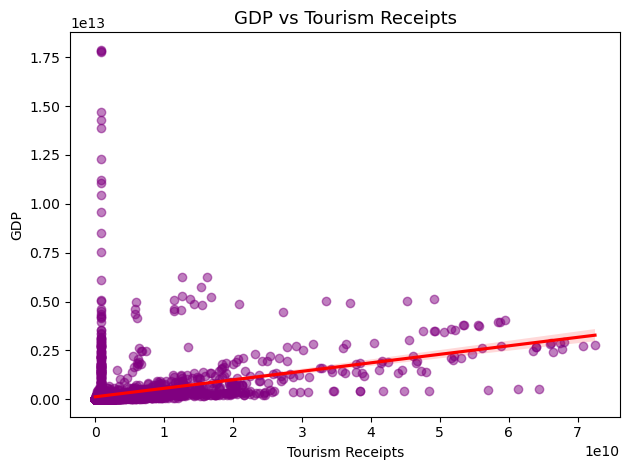

In [50]:
sns.regplot(data=df, x='tourism_receipts', y='gdp', scatter_kws={'alpha':0.5}, color='purple',line_kws={'color':'red'})
plt.title("GDP vs Tourism Receipts", fontsize=13)
plt.xlabel("Tourism Receipts")
plt.ylabel("GDP")
plt.tight_layout()
plt.show()

Interpretation:
If the line trends upward, it shows a positive relationship —>
countries earning more from tourism generally have higher GDP.

### 2. Inflation vs Tourism Receipts

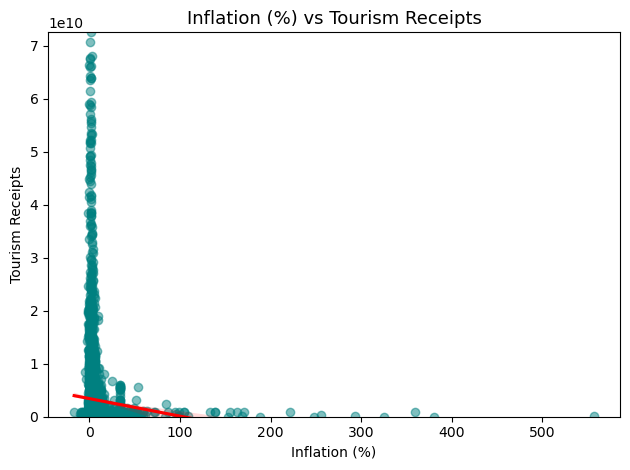

In [51]:
sns.regplot(data=df, x='inflation', y='tourism_receipts', scatter_kws={'alpha':0.5}, color='teal',line_kws={'color':'red'})
plt.title("Inflation (%) vs Tourism Receipts", fontsize=13)
plt.xlabel("Inflation (%)")
plt.ylabel("Tourism Receipts")
plt.ylim(0, df['tourism_receipts'].max())
plt.tight_layout()
plt.show()

Interpretation:
If the trend is downward, higher inflation tends to reduce tourism receipts
(since tourists spend less when prices rise).

### 3. Unemployment vs Tourism Receipts

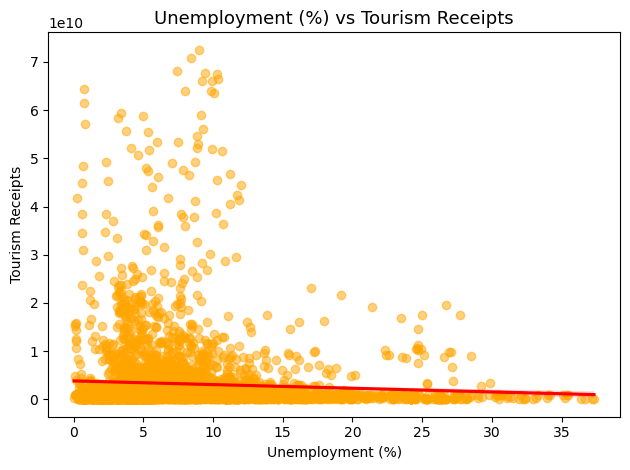

In [52]:
sns.regplot(data=df, x='unemployment', y='tourism_receipts', scatter_kws={'alpha':0.5}, color='orange',line_kws={'color':'red'})
plt.title("Unemployment (%) vs Tourism Receipts", fontsize=13)
plt.xlabel("Unemployment (%)")
plt.ylabel("Tourism Receipts")
plt.tight_layout()
plt.show()

Interpretation:
A weak or negative trend suggests that high unemployment may be associated with lower tourism income.

## MULTIVARIATE ANALYSIS

### 1. Correlation Heatmap (All Numeric Columns)

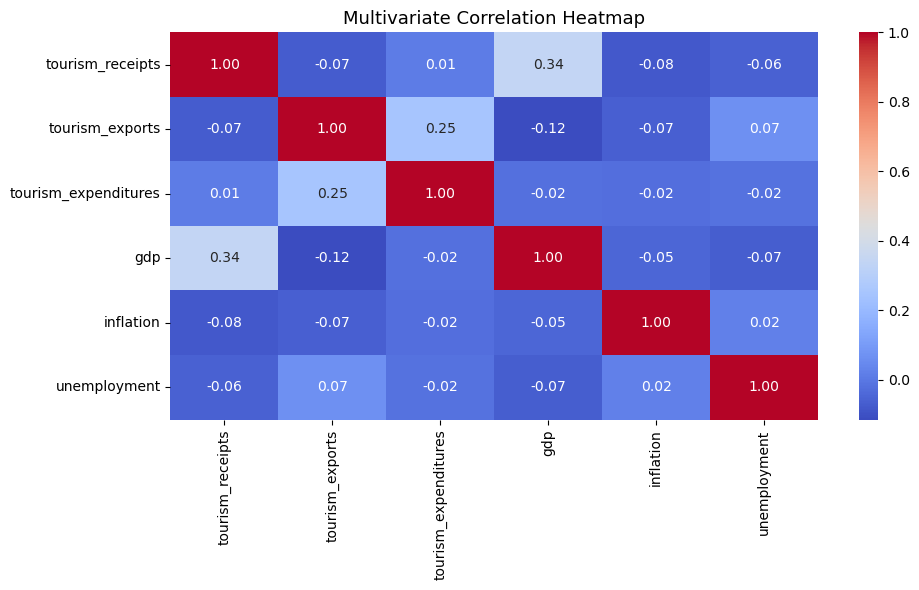

In [53]:
corr = df[['tourism_receipts','tourism_exports','tourism_expenditures',
           'gdp','inflation','unemployment']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Multivariate Correlation Heatmap", fontsize=13)
plt.tight_layout()
plt.show()

Key Observations

1.Tourism Receipts and GDP (r = 0.34)
→ There is a moderate positive correlation between tourism income and GDP.
This suggests that countries with higher tourism receipts generally exhibit stronger economies.

2. Tourism Exports and Tourism Expenditures (r = 0.25)
→ Indicates a weak positive relationship, showing that countries with higher outbound tourism expenditures also tend to earn more from tourism exports.

3. GDP vs Inflation and Unemployment (r ≈ -0.05 to -0.07)
→ Weak or slightly negative correlation, implying that inflation and unemployment have limited direct impact on GDP in this dataset.

4. Low Correlation between Inflation and Other Variables
→ Inflation seems largely independent, suggesting price changes don't directly affect tourism receipts or expenditures in the short term.

5. Overall Structure
→ Most correlations are mild, meaning the dataset represents diverse, independent economic indicators,
suitable for multivariate regression or clustering analysis without severe multicollinearity.

### 2. Pairplot (Scatter Matrix)

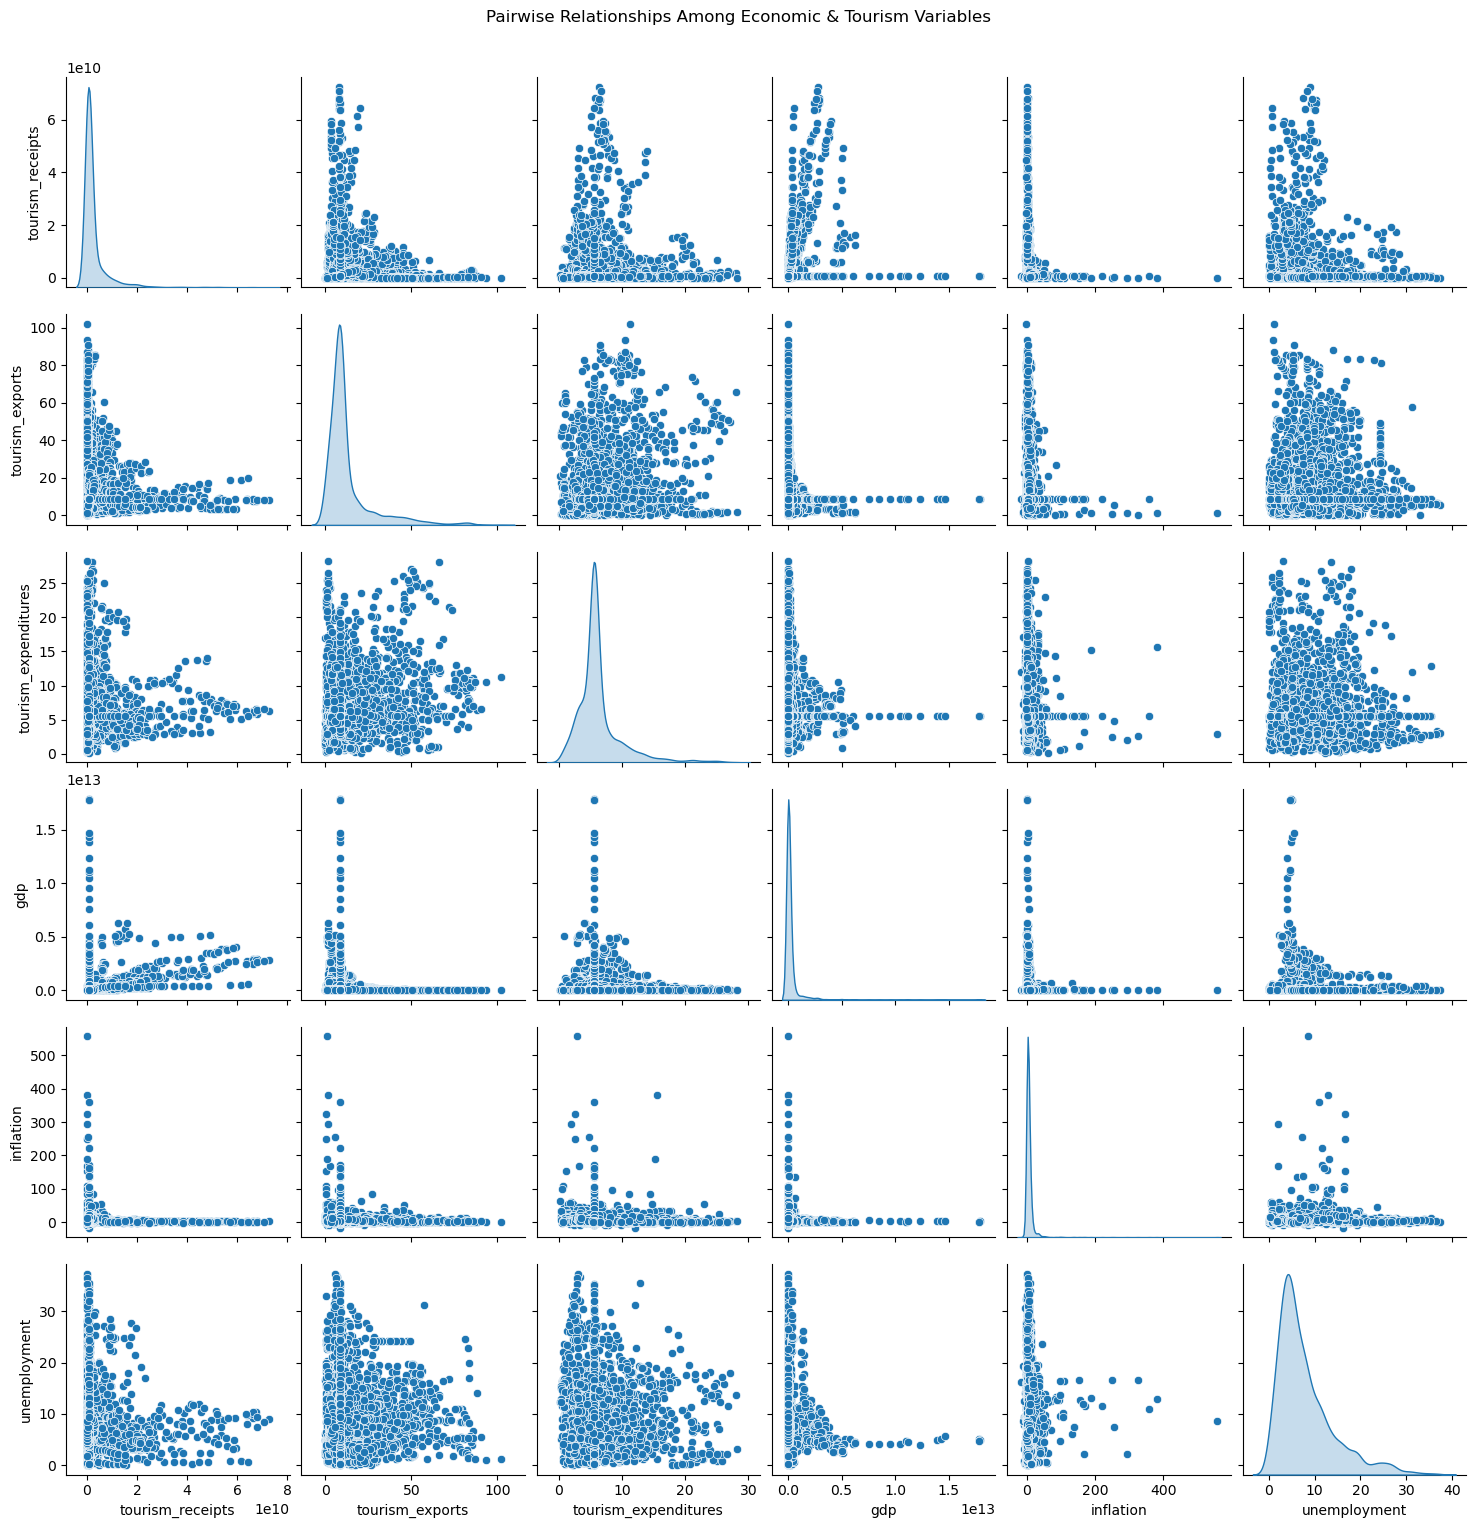

In [54]:
# Pairplot for key variables
sns.pairplot(df[['tourism_receipts','tourism_exports','tourism_expenditures',
                 'gdp','inflation','unemployment']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Among Economic & Tourism Variables", y=1.02)
plt.show()


## ENCODING

In [55]:
df.columns

Index(['country', 'country_code', 'year', 'tourism_receipts',
       'tourism_arrivals', 'tourism_exports', 'tourism_expenditures', 'gdp',
       'inflation', 'unemployment'],
      dtype='object')

In [56]:
df.drop('country_code',axis=1,inplace=True)

In [57]:
df

,country,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Afghanistan,1999,848500000.0,1402000.0,8.645967,5.607922,2.162995e+10,12.686269,7.903
1,Afghanistan,2000,848500000.0,1402000.0,8.645967,5.607922,3.521418e+09,12.686269,7.935
2,Afghanistan,2001,848500000.0,1402000.0,8.645967,5.607922,2.813572e+09,12.686269,7.953
3,Afghanistan,2002,848500000.0,1402000.0,8.645967,5.607922,3.825701e+09,12.686269,7.930
4,Afghanistan,2003,848500000.0,1402000.0,8.645967,5.607922,4.520947e+09,12.686269,7.880
...,...,...,...,...,...,...,...,...,...
4245,Zimbabwe,2019,285000000.0,2294000.0,5.411115,4.760583,2.571741e+10,255.304991,7.373
4246,Zimbabwe,2020,66000000.0,639000.0,1.253967,2.860109,2.686794e+10,557.201817,8.621
4247,Zimbabwe,2021,848500000.0,1402000.0,8.645967,5.607922,2.724052e+10,98.546105,9.540
4248,Zimbabwe,2022,848500000.0,1402000.0,8.645967,5.607922,3.278975e+10,104.705171,10.087


In [58]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols=['country'])
df['country'] = te.fit_transform(df['country'], df['gdp'])


In [59]:
df

,country,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,1.084843e+11,1999,848500000.0,1402000.0,8.645967,5.607922,2.162995e+10,12.686269,7.903
1,1.084843e+11,2000,848500000.0,1402000.0,8.645967,5.607922,3.521418e+09,12.686269,7.935
2,1.084843e+11,2001,848500000.0,1402000.0,8.645967,5.607922,2.813572e+09,12.686269,7.953
3,1.084843e+11,2002,848500000.0,1402000.0,8.645967,5.607922,3.825701e+09,12.686269,7.930
4,1.084843e+11,2003,848500000.0,1402000.0,8.645967,5.607922,4.520947e+09,12.686269,7.880
...,...,...,...,...,...,...,...,...,...
4245,1.105810e+11,2019,285000000.0,2294000.0,5.411115,4.760583,2.571741e+10,255.304991,7.373
4246,1.105810e+11,2020,66000000.0,639000.0,1.253967,2.860109,2.686794e+10,557.201817,8.621
4247,1.105810e+11,2021,848500000.0,1402000.0,8.645967,5.607922,2.724052e+10,98.546105,9.540
4248,1.105810e+11,2022,848500000.0,1402000.0,8.645967,5.607922,3.278975e+10,104.705171,10.087


## Scaling

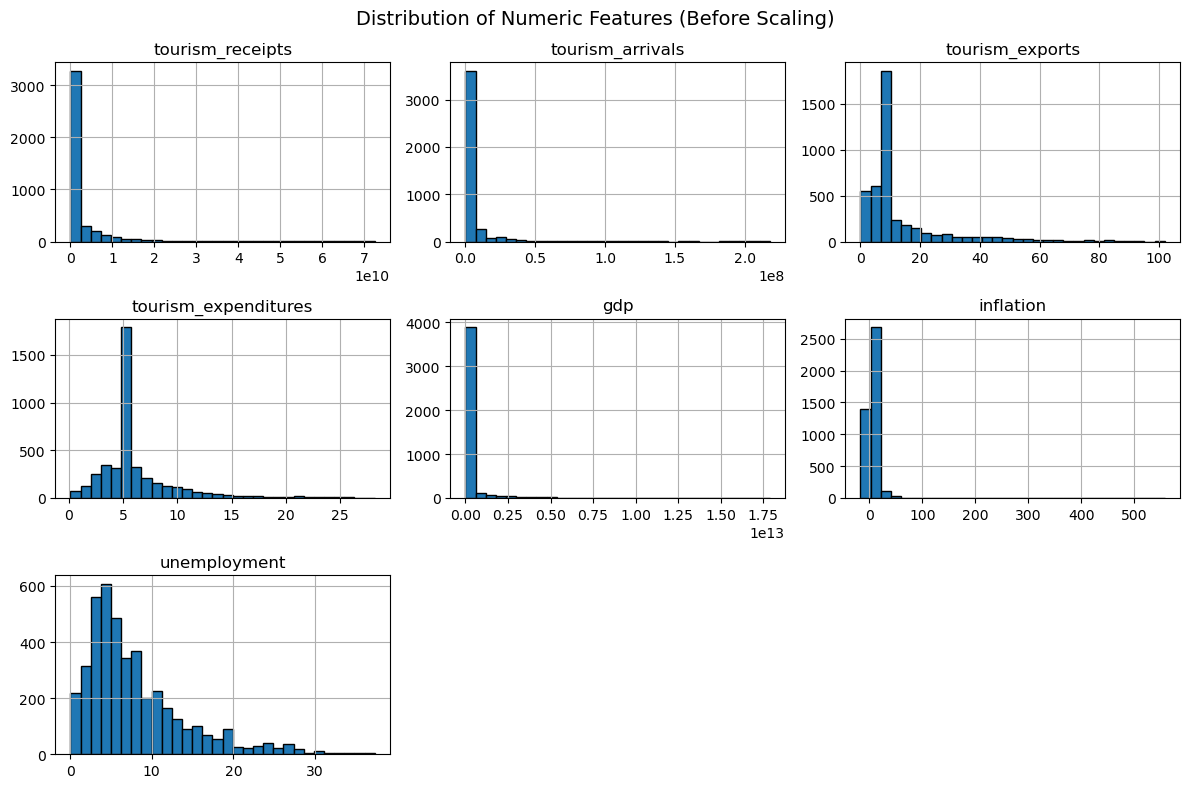

In [60]:
df[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribution of Numeric Features (Before Scaling)", fontsize=14)
plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [62]:
df


,country,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,1.084843e+11,1999,848500000.0,1402000.0,8.645967,5.607922,2.162995e+10,12.686269,7.903
1,1.084843e+11,2000,848500000.0,1402000.0,8.645967,5.607922,3.521418e+09,12.686269,7.935
2,1.084843e+11,2001,848500000.0,1402000.0,8.645967,5.607922,2.813572e+09,12.686269,7.953
3,1.084843e+11,2002,848500000.0,1402000.0,8.645967,5.607922,3.825701e+09,12.686269,7.930
4,1.084843e+11,2003,848500000.0,1402000.0,8.645967,5.607922,4.520947e+09,12.686269,7.880
...,...,...,...,...,...,...,...,...,...
4245,1.105810e+11,2019,285000000.0,2294000.0,5.411115,4.760583,2.571741e+10,255.304991,7.373
4246,1.105810e+11,2020,66000000.0,639000.0,1.253967,2.860109,2.686794e+10,557.201817,8.621
4247,1.105810e+11,2021,848500000.0,1402000.0,8.645967,5.607922,2.724052e+10,98.546105,9.540
4248,1.105810e+11,2022,848500000.0,1402000.0,8.645967,5.607922,3.278975e+10,104.705171,10.087


In [63]:
df_scaled.describe().T[['min','50%','max']]


,min,50%,max
country,1.000409e+11,1.160013e+11,5.084608e+12
year,1.999000e+03,2.011000e+03,2.023000e+03
tourism_receipts,-5.139394e-01,0.000000e+00,4.343606e+01
tourism_arrivals,-4.799246e-01,0.000000e+00,7.416067e+01
tourism_exports,-1.309924e+00,0.000000e+00,1.416228e+01
tourism_expenditures,-2.930734e+00,0.000000e+00,1.214449e+01
gdp,-1.719240e-01,0.000000e+00,1.419600e+02
inflation,-3.836292e+00,0.000000e+00,1.038534e+02
unemployment,-8.748227e-01,0.000000e+00,4.550038e+00


# Project Conclusion

The exploratory analysis of global tourism and economic indicators (1999–2023) provided a comprehensive understanding of how the tourism sector interacts with macroeconomic performance across countries. By systematically cleaning, encoding, scaling, and analyzing the dataset, we were able to uncover significant insights into the tourism–economy relationship.

## Key Takeaways

Tourism as a Growth Driver
The analysis revealed a moderate positive correlation (r = 0.34) between tourism receipts and GDP, highlighting that nations with stronger tourism industries generally enjoy higher economic output.

Tourism Balance and Economic Strength
Countries with a positive tourism balance (where exports exceed expenditures) tend to show healthier GDP levels and lower unemployment rates, suggesting tourism’s stabilizing impact on national economies.

Weak Links with Inflation and Unemployment
Inflation and unemployment show minimal correlation with tourism indicators, implying that tourism operates somewhat independently of short-term economic fluctuations.

Diversity Across Nations
The low overall correlation between most features indicates diverse economic patterns among countries, with tourism’s influence varying by region and economic maturity.

 # Technical Summary

Outliers: Detected using the IQR method — retained to preserve real-world variance.

Encoding: Applied Target Encoding to represent each country by its average GDP value.

Scaling: Used Robust Scaling to normalize numeric features while minimizing the influence of outliers.

EDA: Conducted univariate, bivariate, and multivariate analyses, followed by feature engineering and visualization.

Visualization Tools: Employed seaborn and matplotlib for regression plots, heatmaps, and boxplots.

## Insights and Implications

Tourism contributes meaningfully to global economic performance.
Countries with consistent inbound tourism earnings show stronger GDP levels,
while macroeconomic instability (high inflation or unemployment) tends to weaken tourism growth.
This emphasizes tourism’s dual role as both an economic engine and a stabilizing sector for many nations.